In [159]:
# !pip install lifelines
# !pip install pycox
# !pip install xgbse
# !pip install optuna
# !pip install shap
# !pip install --upgrade ipykernel
# !pip install seaborn
# !pip install sklearn_pandas
# !pip install tableone
# !pip install torch
# !pip install plotly
# !pip install --upgrade survlimepy

DEPRECATION: xgbse 0.2.3 has a non-standard dependency specifier pandas>=1.0.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of xgbse or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV, ElasticNetCV
import os

In [3]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)


In [4]:
datapath = './data'
## data
data = pd.read_csv(os.path.join(datapath+'/'+'UTUC_deep.csv'))

savepath = './save/'


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 773 entries, 0 to 772
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               773 non-null    int64  
 1   NAC              773 non-null    int64  
 2   Pre_WBC          773 non-null    object 
 3   Pre_Neu          773 non-null    object 
 4   Pre_Lym          773 non-null    object 
 5   Pre_Plt          773 non-null    object 
 6   Pre_Hb           773 non-null    object 
 7   Pre_Crp          773 non-null    object 
 8   Pre_alb          773 non-null    object 
 9   Pre_cr           773 non-null    object 
 10  Pre_GFR          773 non-null    object 
 11  Pre_CO           773 non-null    object 
 12  Age              773 non-null    int64  
 13  Female           773 non-null    int64  
 14  BMI              773 non-null    float64
 15  DM               773 non-null    int64  
 16  HTN              773 non-null    int64  
 17  Location_Pelvis 

In [6]:
data.columns

Index(['ID', 'NAC', 'Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb',
       'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female',
       'BMI', 'DM', 'HTN', 'Location_Pelvis', 'Location_Upper', 'Location_Mid',
       'Location_lower', 'HUN', 'path_T', 'Path_N', 'Path_Grade', 'Path_CIS',
       'OS', 'Surv', 'Prg', 'PFS', 'REC_B', 'RFS_B'],
      dtype='object')

In [7]:
data['Pre_WBC'].replace({' ':np.nan},inplace=True)
data['Pre_WBC'] = data['Pre_WBC'].astype(float)
data['Pre_Neu'].replace({' ':np.nan},inplace=True)
data['Pre_Neu'] = data['Pre_Neu'].astype(float)
data['Pre_Lym'].replace({' ':np.nan},inplace=True)
data['Pre_Lym'] = data['Pre_Lym'].astype(float)
data['Pre_Plt'].replace({' ':np.nan},inplace=True)
data['Pre_Plt'] = data['Pre_Plt'].astype(float)
data['Pre_Hb'].replace({' ':np.nan},inplace=True)
data['Pre_Hb'] = data['Pre_Hb'].astype(float)
data['Pre_Crp'].replace({' ':np.nan},inplace=True)
data['Pre_Crp'] = data['Pre_Crp'].astype(float)
data['Pre_alb'].replace({' ':np.nan},inplace=True)
data['Pre_alb'] = data['Pre_alb'].astype(float)
data['Pre_cr'].replace({' ':np.nan},inplace=True)
data['Pre_cr'] = data['Pre_cr'].astype(float)
data['Pre_GFR'].replace({' ':np.nan},inplace=True)
data['Pre_GFR'] = data['Pre_GFR'].astype(float)
data['Pre_CO'].replace({' ':np.nan},inplace=True)
data['Pre_CO'] = data['Pre_CO'].astype(float)


data['Path_N'].replace({' ':np.nan},inplace=True)
data['Path_N'] = data['Path_N'].astype(float)

data['Path_Grade'].replace({' ':np.nan},inplace=True)
data['Path_Grade'] = data['Path_Grade'].astype(float)

data['Path_CIS'].replace({' ':np.nan},inplace=True)
data['Path_CIS'] = data['Path_CIS'].astype(float)

data['Prg'].replace({' ':np.nan},inplace=True)
data['Prg'] = data['Prg'].astype(float)

data['PFS'].replace({' ':np.nan},inplace=True)
data['PFS'] = data['PFS'].astype(float)

data['OS'].replace({' ':np.nan},inplace=True)
data['OS'] = data['OS'].astype(float)

data['REC_B'].replace({' ':np.nan},inplace=True)
data['REC_B'] = data['REC_B'].astype(float)

data['RFS_B'].replace({' ':np.nan},inplace=True)
data['RFS_B'] = data['RFS_B'].astype(float)

In [8]:
data.describe()

,ID,NAC,Pre_WBC,Pre_Neu,Pre_Lym,Pre_Plt,Pre_Hb,Pre_Crp,Pre_alb,Pre_cr,...,path_T,Path_N,Path_Grade,Path_CIS,OS,Surv,Prg,PFS,REC_B,RFS_B
count,773.000000,773.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,773.000000,340.000000,739.000000,760.000000,771.000000,773.000000,678.000000,678.000000,771.000000,711.000000
mean,388.930142,0.080207,6902.072539,60.067098,28.985751,234504.663212,12.731088,0.772396,3.827474,1.133623,...,3.610608,0.314706,0.852503,0.411842,0.273671,41.652005,0.268437,40.839233,0.363165,28.901547
std,225.274180,0.271789,5171.968329,10.897472,9.366921,68376.647655,1.934315,2.215891,0.608109,0.604217,...,1.349435,0.668125,0.354840,0.492491,0.446131,28.560984,0.443473,30.796456,0.717421,26.689057
min,1.000000,0.000000,2000.000000,13.500000,0.000000,6600.000000,6.800000,0.000000,2.400000,0.320000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,194.000000,0.000000,5300.000000,53.000000,22.775000,191750.000000,11.600000,0.100000,3.600000,0.850000,...,2.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,13.000000,0.000000,7.000000
50%,387.000000,0.000000,6300.000000,60.400000,28.600000,231000.000000,12.900000,0.140000,3.800000,1.020000,...,4.000000,0.000000,1.000000,0.000000,0.000000,35.000000,0.000000,35.000000,0.000000,19.000000
75%,584.000000,0.000000,7700.000000,67.000000,35.400000,273000.000000,14.100000,0.370000,4.100000,1.260000,...,5.000000,0.000000,1.000000,1.000000,1.000000,60.000000,1.000000,61.000000,1.000000,43.000000
max,778.000000,1.000000,118000.000000,110.400000,78.100000,590000.000000,17.500000,26.790000,16.000000,8.400000,...,6.000000,2.000000,1.000000,1.000000,1.000000,121.000000,1.000000,121.000000,9.000000,118.000000


In [9]:
data['Location_multiple']=data['Location_Pelvis']+data['Location_Upper']+data['Location_Mid']+data['Location_lower']

In [10]:
raw = data

In [11]:
import xgboost as xgb

## 1. Data preprocessing & Missing value exploration

In [12]:
from tableone import TableOne

In [13]:
data.columns

Index(['ID', 'NAC', 'Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb',
       'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female',
       'BMI', 'DM', 'HTN', 'Location_Pelvis', 'Location_Upper', 'Location_Mid',
       'Location_lower', 'HUN', 'path_T', 'Path_N', 'Path_Grade', 'Path_CIS',
       'OS', 'Surv', 'Prg', 'PFS', 'REC_B', 'RFS_B', 'Location_multiple'],
      dtype='object')

In [14]:
data = data[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb','NAC',
       'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female',
       'BMI', 'DM', 'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N', 'Path_Grade', 'Path_CIS',
       'Prg', 'PFS', 'OS', 'Surv']]

In [15]:
meta = data.dropna(subset=['Prg','PFS','OS', 'Surv'])

In [16]:
meta['HTN'].replace({2:1},inplace=True)

C:\Users\JUN\AppData\Local\Temp\ipykernel_37580\446701576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta['HTN'].replace({2:1},inplace=True)


In [17]:
table1 = TableOne(meta, dip_test=True, normal_test=True, tukey_test=True)


In [18]:
table1

Missing             Overall
n                                                        677
Pre_WBC, mean (SD)                     0     6956.4 (5467.3)
Pre_Neu, mean (SD)                     0         60.1 (11.0)
Pre_Lym, mean (SD)                     0          29.0 (9.5)
Pre_Plt, mean (SD)                     0  234885.7 (68192.8)
Pre_Hb, mean (SD)                      0          12.7 (1.9)
NAC, n (%)                   0         0          627 (92.6)
                             1                      50 (7.4)
Pre_Crp, mean (SD)                     0           0.8 (2.2)
Pre_alb, mean (SD)                     0           3.8 (0.6)
Pre_cr, mean (SD)                      0           1.1 (0.6)
Pre_GFR, mean (SD)                     0         81.3 (39.7)
Pre_CO, mean (SD)                      1          21.3 (9.9)
Age, mean (SD)                         0         68.4 (10.0)
Female, n (%)                0         0          479 (70.8)
                             1                    198 (29.2)
BMI, mean (SD)                         0         25.1 (12.7)
DM, n (%)                    0         0          514 (75.9)
                             1                    163 (24.1)
HTN, n (%)                   0         0          338 (49.9)
                             1                    339 (50.1)
Location_Pelvis, n (%)       0         0          330 (48.7)
                             1                    347 (51.3)
Location_multiple, mean (SD)           0           1.2 (0.5)
HUN, n (%)                   0         0          316 (46.7)
                             1                    361 (53.3)
path_T, mean (SD)                      0           3.6 (1.4)
Path_N, mean (SD)                    366           0.3 (0.7)
Path_Grade, n (%)            0.0      34           98 (15.2)
                             1.0                  545 (84.8)
Path_CIS, n (%)              0.0      13          391 (58.9)
                             1.0                  273 (41.1)
Prg, n (%)                   0.0       0          495 (73.1)
                             1.0                  182 (26.9)
PFS, mean (SD)                         0         40.9 (30.8)
OS, n (%)                    0.0       0          472 (69.7)
                             1.0                  205 (30.3)
Surv, mean (SD)                        0         45.3 (28.7)
[1] Hartigan's Dip Test reports possible
                                  multimodal distributions for: Pre_alb, Pre_CO, Age, Location_multiple, path_T, Path_N.
[2] Normality test reports non-normal
                                  distributions for: Pre_WBC, Pre_Neu, Pre_Lym, Pre_Plt, Pre_Crp, Pre_alb, Pre_cr, Pre_GFR, Pre_CO, Age, BMI, Location_multiple, path_T, Path_N, PFS, Surv.
[3] Tukey test indicates far outliers
                                  in: Pre_WBC, Pre_Plt, Pre_Crp, Pre_cr, Pre_GFR, Pre_CO, Location_multiple, Path_N.

In [19]:
table1.to_csv(datapath+'/'+'Table1.csv')

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

from pycox.datasets import metabric
from pycox.models import CoxPH
from pycox.evaluation import EvalSurv

In [21]:
meta.describe()

,Pre_WBC,Pre_Neu,Pre_Lym,Pre_Plt,Pre_Hb,NAC,Pre_Crp,Pre_alb,Pre_cr,Pre_GFR,...,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS,Prg,PFS,OS,Surv
count,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,677.000000,...,677.000000,677.000000,677.000000,311.000000,643.000000,664.000000,677.000000,677.000000,677.000000,677.000000
mean,6956.425406,60.096160,28.967061,234885.672083,12.747120,0.073855,0.781226,3.832511,1.121207,81.312922,...,1.205318,0.533235,3.621861,0.321543,0.847589,0.411145,0.268833,40.899557,0.302806,45.261448
std,5467.324204,11.009246,9.484649,68192.760108,1.915441,0.261729,2.222134,0.629972,0.579973,39.669294,...,0.459065,0.499263,1.368062,0.685908,0.359698,0.492412,0.443681,30.779113,0.459812,28.650225
min,2000.000000,13.500000,0.000000,6600.000000,6.800000,0.000000,0.000000,2.400000,0.320000,26.696473,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5300.000000,52.900000,22.700000,193000.000000,11.600000,0.000000,0.100000,3.600000,0.840000,58.601978,...,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,13.000000,0.000000,23.000000
50%,6400.000000,60.500000,28.500000,232000.000000,12.900000,0.000000,0.140000,3.800000,1.020000,75.161616,...,1.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,35.000000,0.000000,40.000000
75%,7700.000000,67.100000,35.100000,272000.000000,14.100000,0.000000,0.390000,4.100000,1.260000,95.403514,...,1.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,61.000000,1.000000,63.000000
max,118000.000000,110.400000,78.100000,590000.000000,17.500000,1.000000,26.790000,16.000000,8.400000,553.130662,...,4.000000,1.000000,6.000000,2.000000,1.000000,1.000000,1.000000,121.000000,1.000000,121.000000


In [22]:
temp = meta[meta['Prg']==0]
temp[temp['PFS']>60]['PFS'].replace(60)


0      105.0
1      107.0
4      121.0
5       65.0
7      119.0
       ...  
370     61.0
375     61.0
378     62.0
382     61.0
392     62.0
Name: PFS, Length: 169, dtype: float64

In [23]:
# meta['PFS'] = meta['PFS'].apply(lambda x: 60 if x > 60 else x)

In [24]:
meta

,Pre_WBC,Pre_Neu,Pre_Lym,Pre_Plt,Pre_Hb,NAC,Pre_Crp,Pre_alb,Pre_cr,Pre_GFR,...,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS,Prg,PFS,OS,Surv
0,6500.0,53.5,31.3,233000.0,15.4,0,0.10,4.4,1.10,96.106645,...,1,1,3,NaN,0.0,0.0,0.0,105.0,0.0,105
1,4100.0,51.1,39.7,234000.0,14.8,0,0.10,4.5,0.90,80.307387,...,1,1,2,NaN,1.0,0.0,0.0,107.0,0.0,107
2,5800.0,57.0,31.6,173000.0,11.9,0,1.16,4.1,1.10,81.768519,...,1,0,4,0.0,0.0,0.0,1.0,3.0,1.0,113
3,8400.0,64.4,28.2,351000.0,11.5,0,7.77,4.3,2.10,167.463536,...,1,0,5,NaN,1.0,0.0,0.0,9.0,0.0,9
4,8500.0,51.3,33.5,230000.0,14.8,0,0.10,4.3,1.00,78.081601,...,1,0,2,NaN,0.0,0.0,0.0,121.0,0.0,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,7800.0,66.9,24.3,231000.0,11.4,0,0.14,3.9,1.02,63.495450,...,2,0,5,NaN,NaN,NaN,1.0,6.0,0.0,18
674,7100.0,65.8,22.3,195000.0,10.9,0,2.18,3.3,1.71,133.519537,...,1,0,5,NaN,NaN,NaN,1.0,7.0,0.0,7
675,11200.0,61.9,29.8,337000.0,11.8,0,0.15,4.3,0.81,46.022233,...,1,0,3,NaN,NaN,NaN,0.0,18.0,0.0,18
676,6100.0,64.4,26.3,236000.0,13.7,0,0.19,3.9,1.55,128.022534,...,1,1,4,NaN,NaN,NaN,1.0,0.0,0.0,22


In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=30, verbose=1)

## data

In [26]:
from xgbse.converters import convert_to_structured
from sklearn.model_selection import train_test_split

In [27]:
# from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score
import xgboost as xgb

In [28]:
import optuna

c:\Users\JUN\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [29]:
print(xgb.__version__)

1.7.6


In [30]:
from scipy import interp
from sklearn.metrics import roc_curve, auc, roc_auc_score, precision_recall_curve,average_precision_score
import shap
from xgbse import XGBSEKaplanNeighbors, XGBSEDebiasedBCE,XGBSEStackedWeibull
from xgbse._kaplan_neighbors import DEFAULT_PARAMS
from xgbse.metrics import concordance_index
import sklearn.datasets
import sklearn.metrics

In [31]:
import xgbse

In [32]:
print(xgbse.__version__)

0.2.3


In [33]:
from xgbse.converters import convert_to_structured,convert_data_to_xgb_format

In [34]:
meta.columns

Index(['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'NAC', 'Pre_Crp',
       'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
       'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T',
       'Path_N', 'Path_Grade', 'Path_CIS', 'Prg', 'PFS', 'OS', 'Surv'],
      dtype='object')

In [35]:
anal = meta[meta['NAC']!=1]
anal = anal.drop(columns=['NAC'])

In [36]:
anal['PFS'].describe()

count    627.000000
mean      41.583732
std       30.754629
min        0.000000
25%       14.000000
50%       36.000000
75%       61.000000
max      121.000000
Name: PFS, dtype: float64

In [37]:
anal[anal['Prg']==1]['PFS'].describe()

count    162.000000
mean      16.913580
std       18.081388
min        0.000000
25%        5.000000
50%       10.000000
75%       23.000000
max      103.000000
Name: PFS, dtype: float64

In [38]:
anal.columns

Index(['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
       'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
       'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T',
       'Path_N', 'Path_Grade', 'Path_CIS', 'Prg', 'PFS', 'OS', 'Surv'],
      dtype='object')

In [39]:
E= anal[['Prg']]

In [40]:
weight = len(E[E==0])/ len(E[E==1])

In [41]:
# X = anal[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
#        'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
#        'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade', 'Path_CIS']]
# y = anal[['Prg', 'PFS']]

In [42]:
# X = anal[['Pre_WBC', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Hb', 'Pre_Crp',
#        'Pre_alb', 'Pre_cr', 'Pre_CO', 'Age', 'Female', 'BMI', 'DM',
#        'HTN', 'Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade', 'Path_CIS']]
# y = anal[['Prg', 'PFS']]

In [43]:
# X = anal[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade']]

X = anal[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
       'Path_Grade', 'Path_CIS']]
y = anal[['Prg', 'PFS','OS', 'Surv']]

In [44]:
# y = convert_to_structured(anal['PFS'], anal['Prg'])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7, stratify=y['Prg'])
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=7,stratify=y_train['Prg'])

In [46]:
y_back = convert_to_structured(y['PFS'], y['Prg'])
y_test_back=y_test.copy()
y_train_back=y_train.copy()
y_valid_back=y_valid.copy()
y_test_pfs = convert_to_structured(y_test['PFS'], y_test['Prg'])
y_train_pfs = convert_to_structured(y_train['PFS'], y_train['Prg'])
y_valid_pfs = convert_to_structured(y_valid['PFS'], y_valid['Prg'])

In [47]:

y_test_os = convert_to_structured(y_test['Surv'], y_test['OS'])
y_train_os = convert_to_structured(y_train['Surv'], y_train['OS'])
y_valid_os = convert_to_structured(y_valid['Surv'], y_valid['OS'])

In [48]:
categorical = ['Female','DM','HTN', 'path_T', 'Path_N','Location_multiple','Location_Pelvis','Path_Grade', 'Path_CIS', 'Prg', 'HUN']

In [49]:
Table_1 = TableOne(meta, dip_test=True, normal_test=True, tukey_test=True,
         nonnormal=['Pre_WBC','Pre_Hb', 'Pre_Neu', 'Pre_Lym', 'Pre_Plt', 'Pre_Crp', 'Pre_alb', 'Pre_cr', 'Pre_GFR', 'Pre_CO', 'Age', 'BMI','PFS'],
         categorical=categorical)

In [50]:
Table_1.to_csv(datapath+'/'+'Table1.csv')

In [51]:
Table_1

,,Missing,Overall
n,,,677
"Pre_WBC, median [Q1,Q3]",,0,"6400.0 [5300.0,7700.0]"
"Pre_Neu, median [Q1,Q3]",,0,"60.5 [52.9,67.1]"
"Pre_Lym, median [Q1,Q3]",,0,"28.5 [22.7,35.1]"
"Pre_Plt, median [Q1,Q3]",,0,"232000.0 [193000.0,272000.0]"
"Pre_Hb, median [Q1,Q3]",,0,"12.9 [11.6,14.1]"
"NAC, mean (SD)",,0,0.1 (0.3)
"Pre_Crp, median [Q1,Q3]",,0,"0.1 [0.1,0.4]"
"Pre_alb, median [Q1,Q3]",,0,"3.8 [3.6,4.1]"
"Pre_cr, median [Q1,Q3]",,0,"1.0 [0.8,1.3]"


In [52]:
train_idx = X_train.index
test_idx = X_test.index
valid_idx = X_valid.index

In [53]:
X_train_v = X_train.values
X_test_v = X_test.values
X_valid_v = X_valid.values


In [54]:
meta.loc[train_idx].to_csv(savepath+'/'+'train_data.csv')
meta.loc[test_idx].to_csv(savepath+'/'+'test_data.csv')
meta.loc[valid_idx].to_csv(savepath+'/'+'valid_data.csv')

In [55]:
xgb_train_pfs = convert_data_to_xgb_format(X_train_v,y_train_pfs,'survival:aft')
xgb_valid_pfs = convert_data_to_xgb_format(X_valid_v,y_valid_pfs,'survival:aft')
xgb_test_pfs = convert_data_to_xgb_format(X_test_v,y_test_pfs,'survival:aft')

xgb_train_os = convert_data_to_xgb_format(X_train_v,y_train_os,'survival:aft')
xgb_valid_os = convert_data_to_xgb_format(X_valid_v,y_valid_os,'survival:aft')
xgb_test_os = convert_data_to_xgb_format(X_test_v,y_test_os,'survival:aft')

In [56]:
meta[['Prg', 'PFS']]['PFS'].max()

121.0

In [57]:
TIME_BINS = np.arange(0, 130, 1)
TIME_BINS

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129])

In [58]:
from xgbse import XGBSEKaplanTree, XGBSEBootstrapEstimator,XGBSEDebiasedBCE, XGBSEStackedWeibull
from xgbse.metrics import concordance_index, approx_brier_score,dist_calibration_score

In [59]:
# to easily plot confidence intervals
def plot_ci(mean, upper_ci, lower_ci, i=42, title='Probability of survival $P(T \geq t)$'):

    # plotting mean and confidence intervals
    plt.figure(figsize=(12, 4), dpi=120)
    plt.plot(mean.columns,mean.iloc[i])
    plt.fill_between(mean.columns, lower_ci.iloc[i], upper_ci.iloc[i], alpha=0.2)

    plt.title(title)
    plt.xlabel('Time [days]')
    plt.ylabel('Probability')
    plt.tight_layout()


invalid escape sequence \g
invalid escape sequence \g
invalid escape sequence \g


In [60]:
PARAMS_XGB_AFT = {
    'objective': 'survival:aft',
    'eval_metric': 'aft-nloglik',
    'aft_loss_distribution': 'logistic',
    'aft_loss_distribution_scale': 1,
    'tree_method': 'hist',
    'learning_rate': 5e-2,
    'max_depth': 100,
    # 'booster':'dart',
    'min_child_weight': 5
}

PARAMS_LR = {
    'C': 1e-3,
    'max_iter': 2
}


N_NEIGHBORS = 100


In [61]:
def convert_y(y):
    """
    Convert structured array y into an array of
    event indicators (E) and time of events (T).
    Args:
        y (structured array(numpy.bool_, numpy.number)): Binary event indicator as first field,
            and time of event or time of censoring as second field.
    Returns:
        T ([np.array, pd.Series]): Time of events
        E ([np.array, pd.Series]): Binary event indicator
    """
    event_field, time_field = y.dtype.names
    return y[event_field], y[time_field]

In [62]:
y_test

,Prg,PFS,OS,Surv
338,1.0,9.0,1.0,10
29,1.0,3.0,1.0,9
104,0.0,102.0,0.0,102
572,0.0,31.0,0.0,31
354,0.0,23.0,1.0,23
...,...,...,...,...
450,0.0,52.0,0.0,52
581,0.0,31.0,0.0,31
278,0.0,71.0,0.0,71
367,0.0,1.0,1.0,1


In [63]:
E=y_test['Prg']
T=y_test['PFS']

In [64]:
weight = len(E[E==0])/len(E[E==1])

In [65]:
weight

2.9375

## 1 PFS model

In [66]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

kmf.fit(T, E)



<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 63 total observations, 47 right-censored observations>

In [67]:
PARAMS_XGB_AFT

{'objective': 'survival:aft',
 'eval_metric': 'aft-nloglik',
 'aft_loss_distribution': 'logistic',
 'aft_loss_distribution_scale': 1,
 'tree_method': 'hist',
 'learning_rate': 0.05,
 'max_depth': 100,
 'min_child_weight': 5}

In [68]:
base_params = {'verbosity': 0,
              'objective': 'survival:aft',
              'eval_metric': 'aft-nloglik',
              # 'tree_method': 'hist',
              # 'booster': 'dart',
              'scale_pos_weight': weight
              }  # Hyperparameters common to all trials


def objective(trial):
    params = {'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
              'aft_loss_distribution': trial.suggest_categorical('aft_loss_distribution',
                                                                  ['normal', 'logistic', 'extreme']),
              'aft_loss_distribution_scale': trial.suggest_float('aft_loss_distribution_scale', 0.03,2.0),
              'max_depth': trial.suggest_int('max_depth', 3, 20),
              'lambda': trial.suggest_float('lambda', 1e-3, 1.0),
              'alpha': trial.suggest_float('alpha', 1e-3, 1.0),
              'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
              'colsample_bynode':trial.suggest_float('colsample_bynode', 0.7, 1),
              'colsample_bytree':trial.suggest_float('colsample_bytree', 0.7, 1),
              'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.7, 1)

              }  # Search space

    params.update(base_params)
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'valid-aft-nloglik')
    bst = xgb.train(params, xgb_train_pfs, num_boost_round=10000,
                    evals=[(xgb_train_pfs, 'train'), (xgb_valid_pfs, 'valid')],
                    early_stopping_rounds=100, verbose_eval=False, callbacks=[pruning_callback])
    if bst.best_iteration >= 25:
        return bst.best_score
    else:
        return np.inf  # Reject models with < 25 trees

In [69]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10000, timeout=100)
print('Completed hyperparameter tuning with best aft-nloglik = {}.'.format(study.best_trial.value))
params = {}
params.update(base_params)
params.update(study.best_trial.params)

[I 2023-09-11 22:22:07,112] A new study created in memory with name: no-name-6a62037a-4d2c-4499-9f0d-7853a213194a
[I 2023-09-11 22:22:08,699] Trial 0 finished with value: 5.527092316281793 and parameters: {'learning_rate': 0.022922277645422394, 'aft_loss_distribution': 'normal', 'aft_loss_distribution_scale': 0.22643357364556474, 'max_depth': 11, 'lambda': 0.5236143724967102, 'alpha': 0.14124510066379356, 'min_child_weight': 9.297810135230517, 'colsample_bynode': 0.8785334580258244, 'colsample_bytree': 0.7375590870836111, 'colsample_bylevel': 0.7088098941894175}. Best is trial 0 with value: 5.527092316281793.
[I 2023-09-11 22:22:09,667] Trial 1 finished with value: 4.8057550537879905 and parameters: {'learning_rate': 0.052429052912353065, 'aft_loss_distribution': 'logistic', 'aft_loss_distribution_scale': 0.12148751268444273, 'max_depth': 9, 'lambda': 0.11988585966018822, 'alpha': 0.40007293857682225, 'min_child_weight': 6.769951951797364, 'colsample_bynode': 0.8186103988360127, 'colsa

Completed hyperparameter tuning with best aft-nloglik = 1.7367339503956563.


In [70]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [71]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice


plot_intermediate_values(study)


In [72]:
plot_parallel_coordinate(study)

In [73]:
params_WB = {
    'penalizer':0.001
}

In [74]:
params

{'verbosity': 0,
 'objective': 'survival:aft',
 'eval_metric': 'aft-nloglik',
 'scale_pos_weight': 2.9375,
 'learning_rate': 0.05772555239632952,
 'aft_loss_distribution': 'logistic',
 'aft_loss_distribution_scale': 0.6503200869988109,
 'max_depth': 11,
 'lambda': 0.6555767356616748,
 'alpha': 0.6478913639442038,
 'min_child_weight': 4.021041105805807,
 'colsample_bynode': 0.8471271031099422,
 'colsample_bytree': 0.8934363014079081,
 'colsample_bylevel': 0.8711426757512447}

In [75]:
# %%time
# base model as XGBSEKaplanTree
# xgbse_model = XGBSEKaplanTree(params)
# xgbse_model_pfs = XGBSEKaplanNeighbors(params, N_NEIGHBORS)
xgbse_model_pfs = XGBSEStackedWeibull(params, params_WB)
# xgbse_model = XGBSEDebiasedBCE(params, PARAMS_LR)

# bootstrap meta estimator
xgbse_model_pfs.fit(X_train, y_train_pfs,
              #  persist_train=True,
                validation_data=(X_valid, y_valid_pfs),
                early_stopping_rounds=50,
                index_id=X.index,
                num_boost_round=1000,
                time_bins=TIME_BINS
)


# # # bootstrap meta estimator
bootstrap_estimator_pfs = XGBSEBootstrapEstimator(xgbse_model_pfs, n_estimators=30)
bootstrap_estimator_pfs.fit(
    X_train,
    y_train_pfs,
    validation_data=(X_test, y_test_pfs),
    early_stopping_rounds=10,
    time_bins=TIME_BINS,
)
# mean = xgbse_model.predict(X_test)


# mean_pfs, upper_ci_pfs, lower_ci_pfs = xgbse_model_pfs.predict(X_test, return_ci=True)


# # predicting
mean_pfs, upper_ci_pfs, lower_ci_pfs = bootstrap_estimator_pfs.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_test_pfs, mean_pfs)}")
print(f"Avg. Brier Score: {approx_brier_score(y_test_pfs, mean_pfs)}")
print(f"Calibration Score: {dist_calibration_score(y_test_pfs, mean_pfs)> 0.05}")


C-index: 0.800818553888131
Avg. Brier Score: 0.10247132677477824
Calibration Score: True


In [76]:
dist_calibration_score(y_test_pfs, mean_pfs)

0.9772317084935822

In [77]:
xgbse_model_pfs
# bootstrap_estimator_pfs

XGBSEStackedWeibull(weibull_params={'penalizer': 0.001},
                    xgb_params={'aft_loss_distribution': 'logistic',
                                'aft_loss_distribution_scale': 0.6503200869988109,
                                'alpha': 0.6478913639442038,
                                'colsample_bylevel': 0.8711426757512447,
                                'colsample_bynode': 0.8471271031099422,
                                'colsample_bytree': 0.8934363014079081,
                                'eval_metric': 'aft-nloglik',
                                'lambda': 0.6555767356616748,
                                'learning_rate': 0.05772555239632952,
                                'max_depth': 11,
                                'min_child_weight': 4.021041105805807,
                                'objective': 'survival:aft',
                                'scale_pos_weight': 2.9375, 'verbosity': 0})

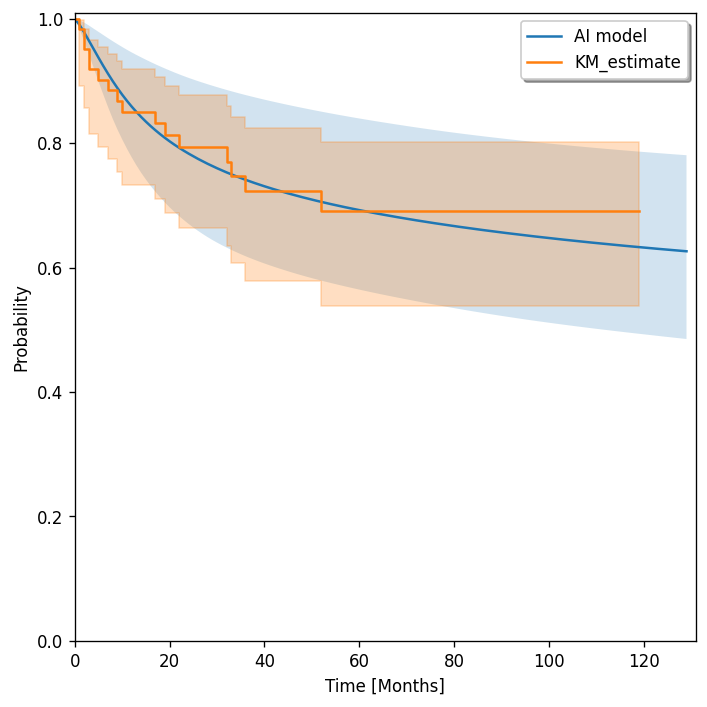

In [78]:
from lifelines.statistics import logrank_test
fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)

# fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
# plt.figure(figsize=(6, 6), dpi=120)

line1, = ax.plot(mean_pfs.columns, mean_pfs.mean(), label="AI model")
line2 = ax.fill_between(mean_pfs.columns, lower_ci_pfs.mean(), upper_ci_pfs.mean(), alpha=0.2)

line3 = kmf.plot_survival_function()


# results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)
# for index, row in mean_pfs.iterrows():
#     plt.plot(row.index, row.values, marker='', color='grey', linewidth=0.3, alpha=0.8)

ax.legend(shadow=True)


plt.xlabel('Time [Months]')
plt.ylabel('Probability')
plt.xlim([-0.01, 131])
plt.ylim([0.0, 1.01])
plt.tight_layout()

In [79]:
mean_pfs.columns

Index([  0.0,   1.0,   2.0,   3.0,   4.0,   5.0,   6.0,   7.0,   8.0,   9.0,
       ...
       120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0],
      dtype='float64', length=130)

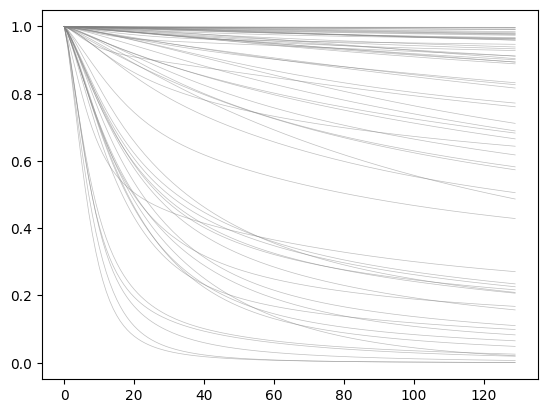

In [80]:
plt.figure()
for index, row in mean_pfs.iterrows():
    plt.plot(row.index, row.values, marker='', color='grey', linewidth=0.5, alpha=0.5)
    

In [81]:
mean_pfs

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0
0,1.0,0.999609,0.999255,0.998877,0.998478,0.998060,0.997625,0.997173,0.996707,0.996227,...,0.911698,0.910870,0.910043,0.909218,0.908395,0.907574,0.906754,0.905937,0.905122,0.904308
1,1.0,0.937968,0.856151,0.768000,0.679800,0.595499,0.517543,0.447274,0.385203,0.331247,...,0.001051,0.001020,0.000990,0.000961,0.000933,0.000905,0.000879,0.000853,0.000828,0.000804
2,1.0,0.999370,0.998748,0.998103,0.997439,0.996762,0.996073,0.995377,0.994673,0.993965,...,0.936237,0.935922,0.935610,0.935300,0.934992,0.934687,0.934384,0.934083,0.933785,0.933489
3,1.0,0.964641,0.923519,0.881087,0.839329,0.799451,0.762192,0.727957,0.696901,0.668998,...,0.279062,0.278110,0.277170,0.276241,0.275322,0.274414,0.273517,0.272630,0.271753,0.270887
4,1.0,0.996251,0.992236,0.988126,0.983970,0.979793,0.975610,0.971434,0.967270,0.963126,...,0.679315,0.677767,0.676230,0.674704,0.673188,0.671682,0.670187,0.668703,0.667228,0.665764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1.0,0.999304,0.998559,0.997767,0.996939,0.996083,0.995205,0.994310,0.993400,0.992480,...,0.930447,0.930208,0.929972,0.929738,0.929507,0.929277,0.929050,0.928825,0.928601,0.928380
59,1.0,0.999466,0.999039,0.998624,0.998217,0.997815,0.997418,0.997024,0.996633,0.996246,...,0.968214,0.968059,0.967905,0.967752,0.967600,0.967450,0.967300,0.967152,0.967004,0.966858
60,1.0,0.999745,0.999592,0.999460,0.999339,0.999226,0.999119,0.999016,0.998918,0.998822,...,0.991172,0.991098,0.991024,0.990950,0.990875,0.990799,0.990724,0.990648,0.990571,0.990494
61,1.0,0.984060,0.964054,0.942133,0.919085,0.895403,0.871442,0.847475,0.823715,0.800333,...,0.224795,0.223856,0.222929,0.222014,0.221110,0.220216,0.219334,0.218462,0.217600,0.216749


In [82]:
mean_pfs.loc[[29]]

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,120.0,121.0,122.0,123.0,124.0,125.0,126.0,127.0,128.0,129.0
29,1.0,0.990028,0.977365,0.963566,0.94915,0.934417,0.919574,0.90477,0.890121,0.875714,...,0.439524,0.438282,0.437055,0.435842,0.434643,0.433457,0.432285,0.431126,0.429979,0.428846


In [83]:
PRG_test, PFS_test = convert_y(y_test_pfs)

In [84]:
mean_pfs['PRG_test'] = PRG_test

In [85]:
mean_pfs['PFS_test'] = PFS_test

In [86]:
temp = mean_pfs[mean_pfs['PRG_test']==True]

In [87]:
temp['PFS_test'].values

array([ 9.,  3., 19.,  5.,  2., 32., 17.,  1., 22., 36., 10.,  7.,  3.,
       52.,  2., 33.])

In [88]:
# temp['e_proba'] = temp.PFS_test.apply(lambda x: temp[x], print(x))
# temp.PFS_test.apply(lambda x: print(x))

In [89]:
dist_calibration_score(y_test_pfs, mean_pfs, returns="all")

{'statistic': 2.628297017682778,
 'pval': 0.9772317084935822,
 'max_deviation': 0.47896559206474354,
 'histogram': bin
 (-0.001, 0.1]    6.500757
 (0.1, 0.2]       7.308603
 (0.2, 0.3]       5.579871
 (0.3, 0.4]       6.129743
 (0.4, 0.5]       6.808161
 (0.5, 0.6]       4.665427
 (0.6, 0.7]       5.363856
 (0.7, 0.8]       4.878806
 (0.8, 0.9]       6.447293
 (0.9, 1.0]       9.317483
 dtype: float64}

In [90]:
predicted_surv = mean_pfs

In [91]:
mean_pfs.mean()

0.0          1.000000
1.0          0.990236
2.0          0.977934
3.0          0.964629
4.0          0.951005
              ...    
127.0        0.627373
128.0        0.626728
129.0        0.626089
PRG_test     0.253968
PFS_test    41.793651
Length: 132, dtype: float64

In [92]:
from bisect import bisect_right
def _match_times_to_windows(times, windows):
    matches = np.array([bisect_right(windows, e) for e in times])
    matches = np.clip(matches, 0, len(windows) - 1)
    return windows[matches]

In [93]:
X_test.loc[29]

Age                   74.000000
Female                 0.000000
BMI                   24.000000
Pre_GFR              118.103476
Location_Pelvis        1.000000
Location_multiple      2.000000
HUN                    1.000000
path_T                 5.000000
Path_N                 2.000000
Path_Grade             1.000000
Path_CIS               0.000000
Name: 29, dtype: float64

In [94]:
y_test_back[y_test_back['Prg']==1]

,Prg,PFS,OS,Surv
338,1.0,9.0,1.0,10
29,1.0,3.0,1.0,9
390,1.0,19.0,0.0,38
120,1.0,5.0,1.0,9
170,1.0,2.0,1.0,4
305,1.0,32.0,1.0,35
634,1.0,17.0,0.0,17
492,1.0,1.0,1.0,4
557,1.0,22.0,0.0,30
105,1.0,36.0,1.0,43


In [95]:
mean_pfs.set_index(keys =y_test_back.index, inplace=True )
upper_ci_pfs.set_index(keys =y_test_back.index, inplace=True )
lower_ci_pfs.set_index(keys =y_test_back.index, inplace=True )

In [96]:
# mean_1 = xgbse_model.predict(X_train, return_ci=False)
mean_1_pfs = bootstrap_estimator_pfs.predict(X_train)
print(f"C-index: {concordance_index(y_train_pfs, mean_1_pfs)}")

C-index: 0.9090872284864067


In [97]:
# mean_2 = xgbse_model.predict(X_valid, return_ci=False)
mean_2_pfs = bootstrap_estimator_pfs.predict(X_valid)
print(f"C-index: {concordance_index(y_valid_pfs, mean_2_pfs)}")

C-index: 0.8522727272727273


##2. OS

In [98]:
E_2=y_test['OS']
T_2=y_test['Surv']

In [99]:
y_test

,Prg,PFS,OS,Surv
338,1.0,9.0,1.0,10
29,1.0,3.0,1.0,9
104,0.0,102.0,0.0,102
572,0.0,31.0,0.0,31
354,0.0,23.0,1.0,23
...,...,...,...,...
450,0.0,52.0,0.0,52
581,0.0,31.0,0.0,31
278,0.0,71.0,0.0,71
367,0.0,1.0,1.0,1


In [100]:
weight_2 = len(E_2[E_2==0])/len(E_2[E_2==1])

In [101]:
weight_2

1.8636363636363635

In [102]:
from lifelines import KaplanMeierFitter
kmf_os = KaplanMeierFitter()

kmf_os.fit(T_2, E_2)



<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 63 total observations, 41 right-censored observations>

In [103]:
base_params = {'verbosity': 0,
              'objective': 'survival:aft',
              'eval_metric': 'aft-nloglik',
              'tree_method': 'hist',
              # 'booster': 'dart',
              'scale_pos_weight': weight_2
              }  # Hyperparameters common to all trials



def objective(trial):
    params = {'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.1),
              'aft_loss_distribution': trial.suggest_categorical('aft_loss_distribution',
                                                                  ['normal', 'logistic', 'extreme']),
              'aft_loss_distribution_scale': trial.suggest_float('aft_loss_distribution_scale', 0.3,2.0),
              'max_depth': trial.suggest_int('max_depth', 3, 20),
              'lambda': trial.suggest_float('lambda', 1e-3, 1.0),
              'alpha': trial.suggest_float('alpha', 1e-3, 1.0),
              'min_child_weight': trial.suggest_float('min_child_weight', 1, 10),
              'colsample_bynode':trial.suggest_float('colsample_bynode', 0.7, 1),
              'colsample_bytree':trial.suggest_float('colsample_bytree', 0.7, 1),
              'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.7, 1)

              }  # Search space

    params.update(base_params)
    pruning_callback = optuna.integration.XGBoostPruningCallback(trial, 'valid-aft-nloglik')
    bst = xgb.train(params, xgb_train_os, num_boost_round=10000,
                    evals=[(xgb_train_os, 'train'), (xgb_valid_os, 'valid')],
                    early_stopping_rounds=100, verbose_eval=False, callbacks=[pruning_callback])
    if bst.best_iteration >= 25:
        return bst.best_score
    else:
        return np.inf  # Reject models with < 25 trees

In [104]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000, timeout=100)
print('Completed hyperparameter tuning with best aft-nloglik = {}.'.format(study.best_trial.value))
params = {}
params.update(base_params)
params.update(study.best_trial.params)

[I 2023-09-11 22:24:08,414] A new study created in memory with name: no-name-6afd9478-3be8-4d02-adda-6806b9f869d3
[I 2023-09-11 22:24:08,635] Trial 0 finished with value: 2.0711490009477287 and parameters: {'learning_rate': 0.044747090673593455, 'aft_loss_distribution': 'logistic', 'aft_loss_distribution_scale': 1.2655885270326266, 'max_depth': 7, 'lambda': 0.4091827977785685, 'alpha': 0.5063403224194224, 'min_child_weight': 8.737588284653253, 'colsample_bynode': 0.873159553585591, 'colsample_bytree': 0.7165587116639275, 'colsample_bylevel': 0.8583745692764575}. Best is trial 0 with value: 2.0711490009477287.
[I 2023-09-11 22:24:08,894] Trial 1 finished with value: 2.1448360742835613 and parameters: {'learning_rate': 0.024982454276177547, 'aft_loss_distribution': 'logistic', 'aft_loss_distribution_scale': 1.7041097526717048, 'max_depth': 12, 'lambda': 0.42583228537833867, 'alpha': 0.3871069542658627, 'min_child_weight': 9.595895546663895, 'colsample_bynode': 0.7976210937514764, 'colsam

Completed hyperparameter tuning with best aft-nloglik = 1.963691972737791.


In [105]:
fig = optuna.visualization.plot_optimization_history(study)
fig.show()

In [106]:
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice


plot_intermediate_values(study)


In [107]:
plot_parallel_coordinate(study)

[W 2023-09-11 22:25:49,017] Trial 28 is omitted in visualization because its objective value is inf or nan.
[W 2023-09-11 22:25:49,019] Trial 29 is omitted in visualization because its objective value is inf or nan.
[W 2023-09-11 22:25:49,021] Trial 38 is omitted in visualization because its objective value is inf or nan.
[W 2023-09-11 22:25:49,021] Trial 51 is omitted in visualization because its objective value is inf or nan.
[W 2023-09-11 22:25:49,023] Trial 73 is omitted in visualization because its objective value is inf or nan.
[W 2023-09-11 22:25:49,024] Trial 81 is omitted in visualization because its objective value is inf or nan.
[W 2023-09-11 22:25:49,025] Trial 107 is omitted in visualization because its objective value is inf or nan.
[W 2023-09-11 22:25:49,027] Trial 116 is omitted in visualization because its objective value is inf or nan.
[W 2023-09-11 22:25:49,029] Trial 250 is omitted in visualization because its objective value is inf or nan.
[W 2023-09-11 22:25:49,03

In [108]:
params

{'verbosity': 0,
 'objective': 'survival:aft',
 'eval_metric': 'aft-nloglik',
 'tree_method': 'hist',
 'scale_pos_weight': 1.8636363636363635,
 'learning_rate': 0.06019100285657792,
 'aft_loss_distribution': 'logistic',
 'aft_loss_distribution_scale': 0.7303273012380302,
 'max_depth': 19,
 'lambda': 0.31862043544081486,
 'alpha': 0.77424081571417,
 'min_child_weight': 2.642818139766237,
 'colsample_bynode': 0.7655433993145532,
 'colsample_bytree': 0.717563519214567,
 'colsample_bylevel': 0.8025908196061938}

In [109]:
# %%time

# base model as XGBSEKaplanTree
# xgbse_model = XGBSEKaplanTree(params)
# xgbse_model = XGBSEKaplanNeighbors(params, N_NEIGHBORS)
xgbse_model_os = XGBSEStackedWeibull(params, params_WB)
# xgbse_model = XGBSEDebiasedBCE(params, PARAMS_LR)

# bootstrap meta estimator
xgbse_model_os.fit(X_train, y_train_os,
              #  persist_train=True,
                validation_data=(X_valid, y_valid_os),
                early_stopping_rounds=50,
                index_id=X.index,
                num_boost_round=1000,
                time_bins=TIME_BINS
)


# # # bootstrap meta estimator
bootstrap_estimator_os = XGBSEBootstrapEstimator(xgbse_model_os, n_estimators=30)
bootstrap_estimator_os.fit(
    X_train,
    y_train_os,
    validation_data=(X_test, y_test_os),
    early_stopping_rounds=10,
    time_bins=TIME_BINS,
)
# mean = xgbse_model.predict(X_test)


# mean, upper_ci, lower_ci = xgbse_model.predict(X_test, return_ci=True)


# # predicting
mean_os, upper_ci_os, lower_ci_os = bootstrap_estimator_os.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_test_os, mean_os)}")
print(f"Avg. Brier Score: {approx_brier_score(y_test_os, mean_os)}")
print(f"Calibration Score: {dist_calibration_score(y_test_os, mean_os)> 0.05}")


C-index: 0.8099447513812155
Avg. Brier Score: 0.11917038997467519
Calibration Score: True


In [110]:
dist_calibration_score(y_test_os, mean_os)

0.31962552087453355

In [111]:
bootstrap_estimator_os

XGBSEBootstrapEstimator(base_estimator=XGBSEStackedWeibull(weibull_params={'penalizer': 0.001},
                                                           xgb_params={'aft_loss_distribution': 'logistic',
                                                                       'aft_loss_distribution_scale': 0.7303273012380302,
                                                                       'alpha': 0.77424081571417,
                                                                       'colsample_bylevel': 0.8025908196061938,
                                                                       'colsample_bynode': 0.7655433993145532,
                                                                       'colsample_bytree': 0.717563519214567,
                                                                       'eval_metric': 'aft-nloglik',
                                                                       'lambda': 0.31862043544081486,
                                                                       'learning_rate': 0.06019100285657792,
                                                                       'max_depth': 19,
                                                                       'min_child_weight': 2.642818139766237,
                                                                       'objective': 'survival:aft',
                                                                       'scale_pos_weight': 1.8636363636363635,
                                                                       'tree_method': 'hist',
                                                                       'verbosity': 0}),
                        n_estimators=30)

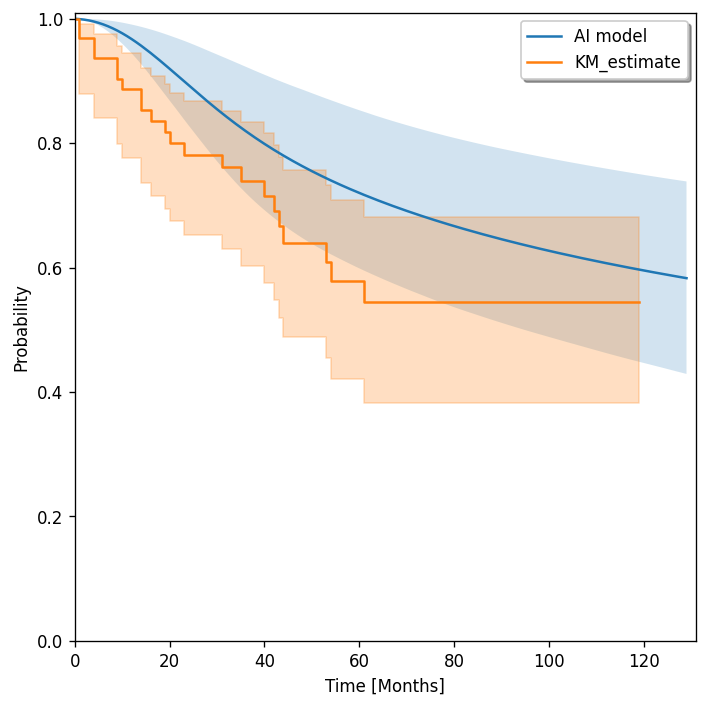

In [112]:
from lifelines.statistics import logrank_test
fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)

# fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
# plt.figure(figsize=(6, 6), dpi=120)



line1, = ax.plot(mean_os.columns, mean_os.mean(), label="AI model")
line2 = ax.fill_between(mean_os.columns, lower_ci_os.mean(), upper_ci_os.mean(), alpha=0.2)


line3 = kmf_os.plot_survival_function()


# results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)


ax.legend(shadow=True)


plt.xlabel('Time [Months]')
plt.ylabel('Probability')
plt.xlim([-0.01, 131])
plt.ylim([0.0, 1.01])
plt.tight_layout()

In [113]:
dist_calibration_score(y_test_os, mean_os, returns="all")

{'statistic': 10.392875484173278,
 'pval': 0.31962552087453355,
 'max_deviation': 0.985022042003139,
 'histogram': bin
 (-0.001, 0.1]     4.846215
 (0.1, 0.2]        4.846215
 (0.2, 0.3]        6.633835
 (0.3, 0.4]        4.442088
 (0.4, 0.5]        5.268675
 (0.5, 0.6]        5.182002
 (0.6, 0.7]        3.932295
 (0.7, 0.8]        5.735904
 (0.8, 0.9]        9.607132
 (0.9, 1.0]       12.505639
 dtype: float64}

In [114]:
predicted_surv = mean_os

In [115]:
mean_os.mean()

0.0      1.000000
1.0      0.999388
2.0      0.998496
3.0      0.997216
4.0      0.995528
           ...   
125.0    0.588222
126.0    0.586862
127.0    0.585514
128.0    0.584178
129.0    0.582854
Length: 130, dtype: float64

In [116]:
X_test.loc[29]

Age                   74.000000
Female                 0.000000
BMI                   24.000000
Pre_GFR              118.103476
Location_Pelvis        1.000000
Location_multiple      2.000000
HUN                    1.000000
path_T                 5.000000
Path_N                 2.000000
Path_Grade             1.000000
Path_CIS               0.000000
Name: 29, dtype: float64

In [117]:
y_test_back[y_test_back['Prg']==1]

,Prg,PFS,OS,Surv
338,1.0,9.0,1.0,10
29,1.0,3.0,1.0,9
390,1.0,19.0,0.0,38
120,1.0,5.0,1.0,9
170,1.0,2.0,1.0,4
305,1.0,32.0,1.0,35
634,1.0,17.0,0.0,17
492,1.0,1.0,1.0,4
557,1.0,22.0,0.0,30
105,1.0,36.0,1.0,43


In [118]:
mean_os.set_index(keys =y_test_back.index, inplace=True )
upper_ci_os.set_index(keys =y_test_back.index, inplace=True )
lower_ci_os.set_index(keys =y_test_back.index, inplace=True )

In [119]:
# mean_1 = xgbse_model.predict(X_train, return_ci=False)
mean_1_os = bootstrap_estimator_os.predict(X_train)
print(f"C-index: {concordance_index(y_train_os, mean_1_os)}")

C-index: 0.9016447731537698


In [120]:
# mean_2 = xgbse_model.predict(X_valid, return_ci=False)
mean_2_os = bootstrap_estimator_os.predict(X_valid)
print(f"C-index: {concordance_index(y_valid_os, mean_2_os)}")

C-index: 0.7729885057471264


##3. Save

In [121]:
import pickle

# 모델 저장
pickle.dump(bootstrap_estimator_os, open(savepath+'UTUC_CSS.pkl', 'wb'))

In [122]:

pickle.dump(bootstrap_estimator_pfs, open(savepath+'UTUC_PFS.pkl', 'wb'))

In [123]:
savepath

'./save/'

In [124]:
import pickle

In [125]:
!pip install lime

DEPRECATION: xgbse 0.2.3 has a non-standard dependency specifier pandas>=1.0.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of xgbse or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [126]:
import lime
import lime.lime_tabular

In [127]:
from traitlets.config import validate
# Re-run training with the best hyperparameter combination
print('Re-running the best trial... params = {}'.format(params))

xgb_model_pfs = xgb.train(
            params,
            xgb_train_pfs,
            # maximize=True,
            evals= [(xgb_valid_pfs, 'eval')],
            num_boost_round=1000,
            early_stopping_rounds=100,
            verbose_eval=10
)

Re-running the best trial... params = {'verbosity': 0, 'objective': 'survival:aft', 'eval_metric': 'aft-nloglik', 'tree_method': 'hist', 'scale_pos_weight': 1.8636363636363635, 'learning_rate': 0.06019100285657792, 'aft_loss_distribution': 'logistic', 'aft_loss_distribution_scale': 0.7303273012380302, 'max_depth': 19, 'lambda': 0.31862043544081486, 'alpha': 0.77424081571417, 'min_child_weight': 2.642818139766237, 'colsample_bynode': 0.7655433993145532, 'colsample_bytree': 0.717563519214567, 'colsample_bylevel': 0.8025908196061938}
[0]	eval-aft-nloglik:3.59613
[10]	eval-aft-nloglik:2.32189
[20]	eval-aft-nloglik:2.03692
[30]	eval-aft-nloglik:1.91837
[40]	eval-aft-nloglik:1.84874
[50]	eval-aft-nloglik:1.82715
[60]	eval-aft-nloglik:1.81289
[70]	eval-aft-nloglik:1.80853
[80]	eval-aft-nloglik:1.80766
[90]	eval-aft-nloglik:1.79959
[100]	eval-aft-nloglik:1.80260
[110]	eval-aft-nloglik:1.81020
[120]	eval-aft-nloglik:1.81307
[130]	eval-aft-nloglik:1.81717
[140]	eval-aft-nloglik:1.82695
[150]	eva

In [128]:
from lifelines.utils import concordance_index as cindex

preds = xgb_model_pfs.predict(xgb_test_pfs).astype(float)
T = meta['PFS'][test_idx]
E = meta['Prg'][test_idx]
cind = cindex(T, preds , E)
print(f"C-index: {cind:.3f}")
print(f"Average survival time: {preds.mean():.0f} Months")

C-index: 0.799
Average survival time: 461 Months


In [129]:
preds_2 = xgb_model_pfs.predict(xgb_train_pfs).astype(float)
T_2 = meta['PFS'][train_idx]
E_2 = meta['Prg'][train_idx]
cind_2 = cindex(T_2, preds_2, E_2)

preds_3 = xgb_model_pfs.predict(xgb_valid_pfs).astype(float)
T_3 = meta['PFS'][valid_idx]
E_3 = meta['Prg'][valid_idx]
cind_3 = cindex(T_3, preds_3, E_3)

print (cind_2, cind_3)

0.9791081319739905 0.8349358974358975


In [130]:
X.columns

Index(['Age', 'Female', 'BMI', 'Pre_GFR', 'Location_Pelvis',
       'Location_multiple', 'HUN', 'path_T', 'Path_N', 'Path_Grade',
       'Path_CIS'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

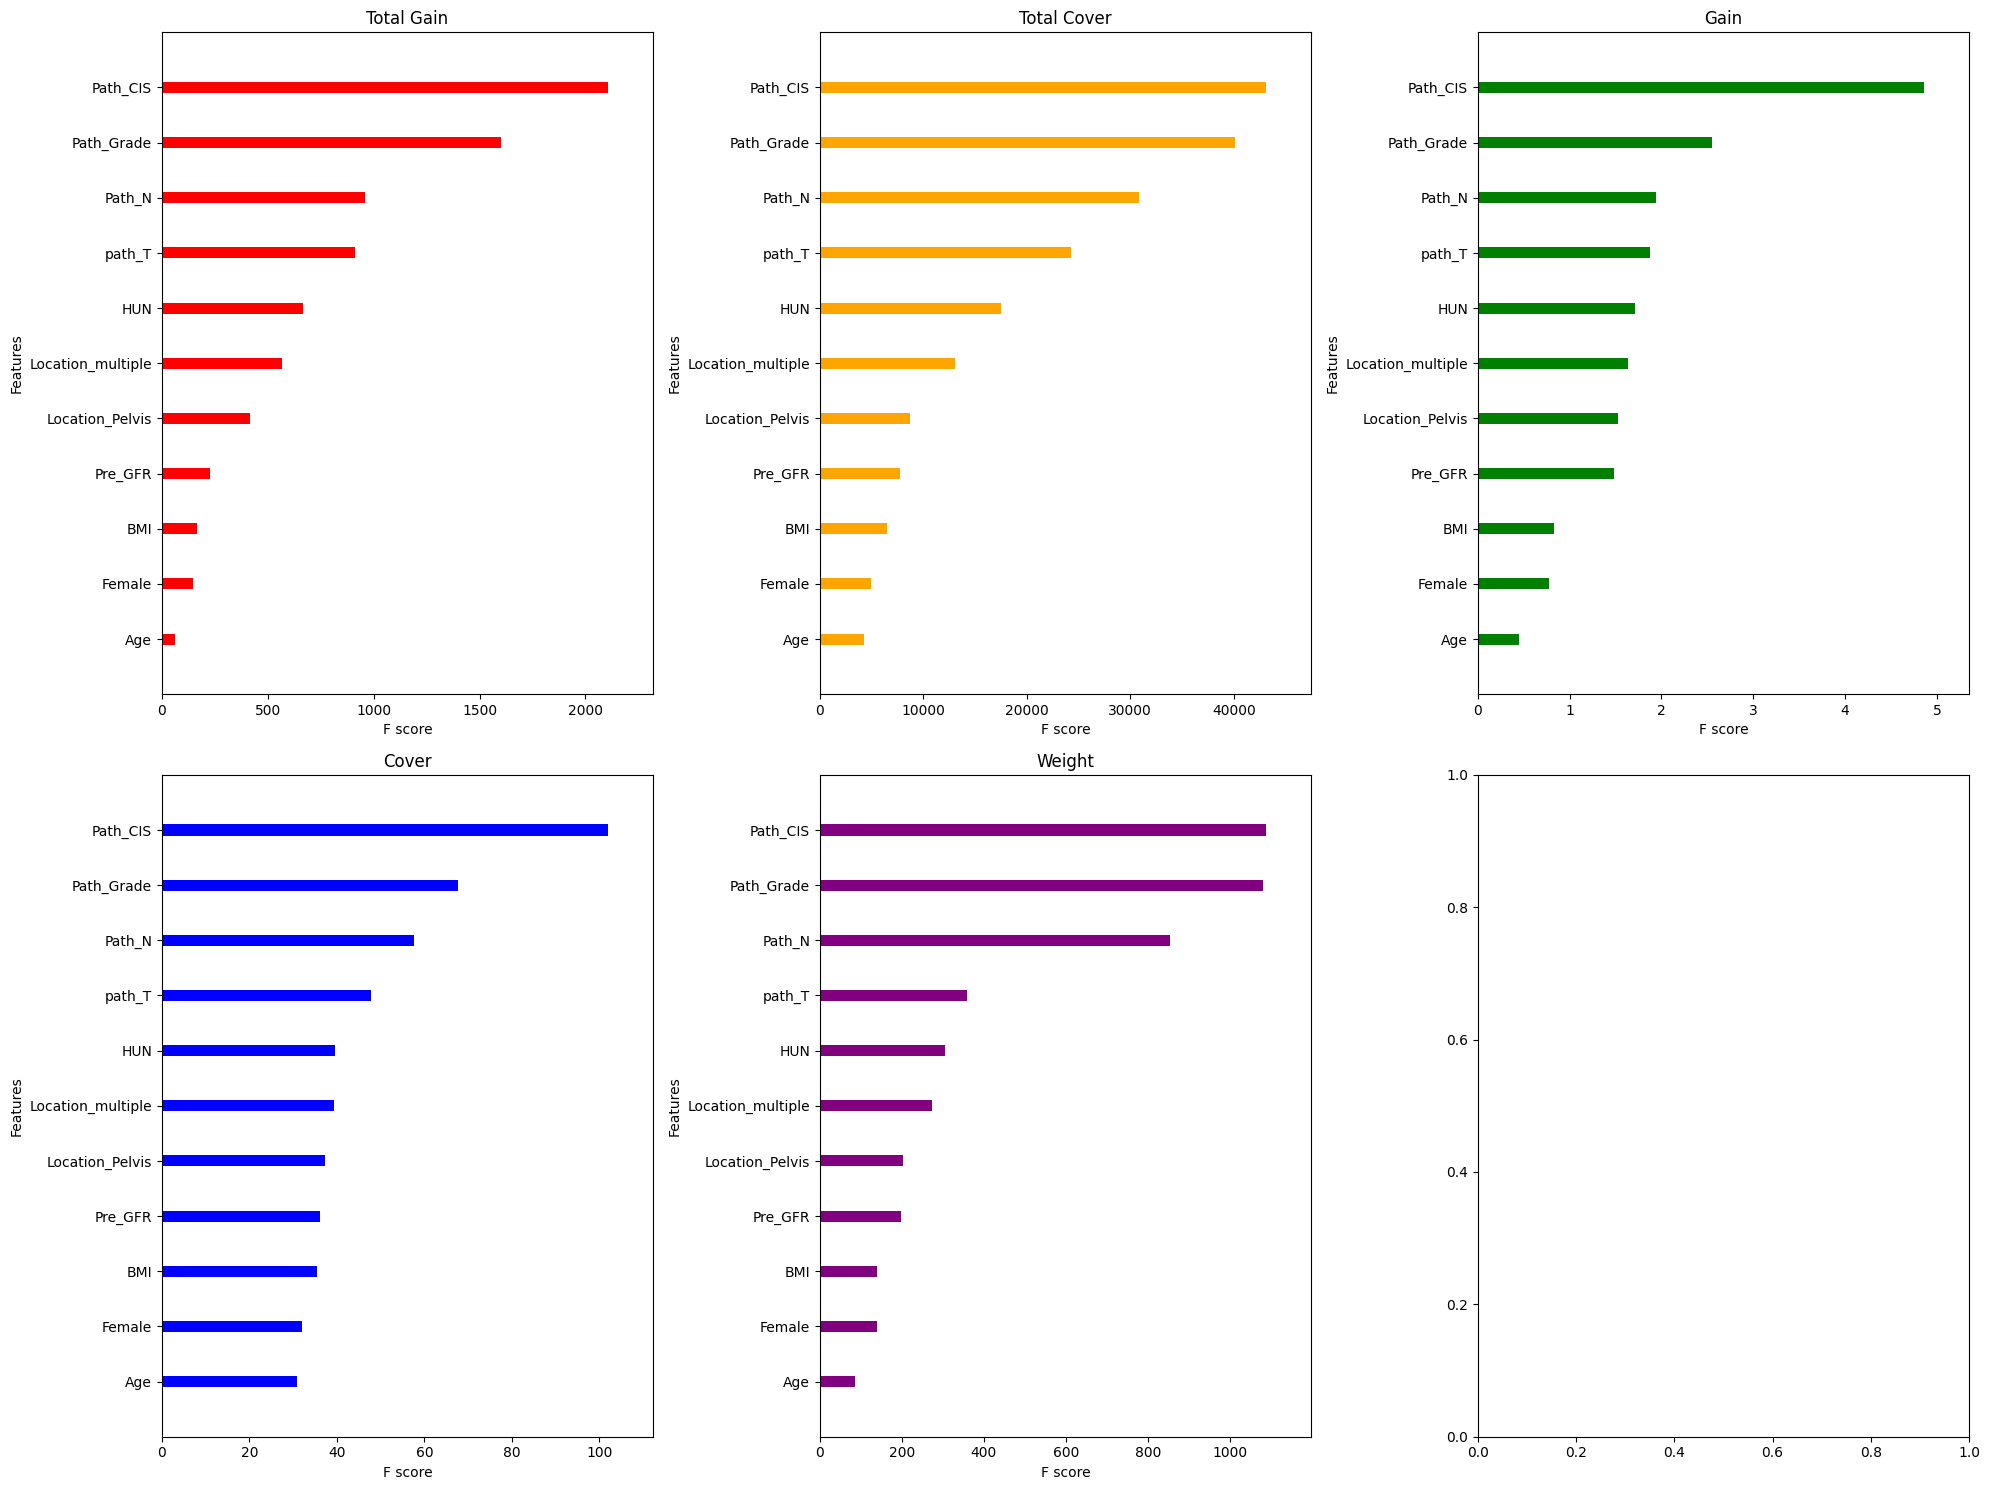

In [131]:
from xgboost import plot_importance

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,15))

axes = [ax for row_axes in axes for ax in row_axes]

plot_importance(xgb_model_pfs,importance_type='total_gain', title='Total Gain', grid=False, ax=axes[0], color='red',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model_pfs,importance_type='total_cover', title='Total Cover', grid=False, ax=axes[1] ,color='orange',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model_pfs,importance_type='gain', title='Gain', grid=False, ax=axes[2], color='green',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model_pfs,importance_type='cover', title='Cover', grid=False, ax=axes[3], color='blue',show_values=False).set_yticklabels(X.columns)
plot_importance(xgb_model_pfs,importance_type='weight', title='Weight', grid=False, ax=axes[4], color='purple',show_values=False).set_yticklabels(X.columns)

plt.tight_layout()
plt
plt.show


In [132]:
import lime
import lime.lime_tabular

# explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=X.columns, class_names=['Progression'], verbose=True, mode='regression')

In [133]:

## kernel shap sends data as numpy array which has no column names, so we fix it
## source: https://gist.github.com/noleto/05dfa4a691ebbc8816c035b86d2d00d4#file-shap_xgboost-py-L46
columns = X_train.columns

def xgbse_predict(data_asarray):
    data_asframe =  pd.DataFrame(data_asarray, columns=columns)
    return bootstrap_estimator_pfs.predict(data_asframe)

In [134]:
import shap

In [135]:

## kernel shap sends data as numpy array which has no column names, so we fix it
## source: https://gist.github.com/noleto/05dfa4a691ebbc8816c035b86d2d00d4#file-shap_xgboost-py-L46

#### Kernel SHAP
shap_kernel_explainer = shap.KernelExplainer(xgbse_predict, X_train.head(30))

# Explain a single instance - output: (1, n_time_buckets, n_features)
shap_one = shap_kernel_explainer.shap_values(X_train.iloc[0])

# Get explanations for the first time bucket
first_time_bucket_shap_values = pd.Series(shap_one[0])

# Print shap values for the first time bucket and the corresponding features
print(pd.concat([first_time_bucket_shap_values, pd.Series(columns)], axis=1))

               0                  1
0  -3.514616e-06                Age
1   0.000000e+00             Female
2   1.045714e-06                BMI
3   1.045714e-06            Pre_GFR
4   0.000000e+00    Location_Pelvis
5   0.000000e+00  Location_multiple
6  -2.162596e-07                HUN
7   1.011631e-06             path_T
8   0.000000e+00             Path_N
9   0.000000e+00         Path_Grade
10  1.045712e-06           Path_CIS


In [136]:
# shap_one = shap_kernel_explainer.shap_values(X_train)

In [137]:

# #### Kernel SHAP


# # Explain a single instance - output: (1, n_time_buckets, n_features)
# shap_one = shap_kernel_explainer.shap_values(X_train.iloc[0])

# # Get explanations for the first time bucket
# first_time_bucket_shap_values = pd.Series(shap_one[0])

# # Print shap values for the first time bucket and the corresponding features
# print(pd.concat([first_time_bucket_shap_values, pd.Series(columns)], axis=1))

In [138]:
# shap.summary_plot(first_time_bucket_shap_values, X_train)

In [139]:
ext_1 = pd.read_csv(os.path.join(datapath+'/'+'UTUC_deep_SNU.csv'))
ext_2 = pd.read_csv(os.path.join(datapath+'/'+'UTUC_deep_Hallym.csv'))

In [140]:
ext_1['Pre_GFR'].replace({' ':np.nan},inplace=True)
ext_1['Pre_GFR'] = ext_1['Pre_GFR'].astype(float)

ext_1['Path_N'].replace({' ':np.nan},inplace=True)
ext_1['Path_N'].replace({'N2':1},inplace=True)
ext_1['Path_N'] = ext_1['Path_N'].astype(float)

ext_1['Path_Grade'].replace({' ':np.nan},inplace=True)
ext_1['Path_Grade'] = ext_1['Path_Grade'].astype(float)

ext_1['Path_CIS'].replace({' ':np.nan},inplace=True)
ext_1['Path_CIS'] = ext_1['Path_CIS'].astype(float)

ext_1['Prg'].replace({' ':np.nan},inplace=True)
ext_1['Prg'] = ext_1['Prg'].astype(float)

ext_1['PFS'].replace({' ':np.nan},inplace=True)
ext_1['PFS'] = ext_1['PFS'].astype(float)

ext_1['OS'].replace({' ':np.nan},inplace=True)
ext_1['OS'] = ext_1['OS'].astype(float)

In [141]:
ext_1 = ext_1.dropna(subset=['Prg','PFS','OS', 'Surv','path_T'])
ext_2 = ext_2.dropna(subset=['Prg','PFS','OS', 'Surv',])

In [142]:
# X_snu = ext_1[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
#        'Path_Grade']]
X_snu = ext_1[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N',
       'Path_Grade', 'Path_CIS']]
y_snu = ext_1[['Prg', 'PFS','OS', 'Surv']]

In [143]:
X_snu.describe()

,Age,Female,BMI,Pre_GFR,Location_Pelvis,Location_multiple,HUN,path_T,Path_N,Path_Grade,Path_CIS
count,159.000000,159.000000,159.000000,157.000000,159.000000,159.000000,158.000000,159.000000,38.000000,149.000000,159.000000
mean,68.427673,0.289308,24.994969,62.662420,0.452830,0.081761,0.474684,3.358491,0.131579,0.805369,0.333333
std,9.921501,0.454874,3.297483,22.110792,0.499343,0.274866,0.500946,1.346740,0.342570,0.397252,0.472894
min,41.000000,0.000000,18.000000,4.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,61.000000,0.000000,22.950000,48.400000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,69.000000,0.000000,24.900000,61.200000,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000
75%,75.000000,1.000000,26.650000,78.600000,1.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000
max,93.000000,1.000000,40.900000,120.800000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000


In [144]:
# X_Hallym = ext_1[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N','Path_Grade']]
X_Hallym = ext_1[['Age', 'Female', 'BMI', 'Pre_GFR','Location_Pelvis', 'Location_multiple', 'HUN', 'path_T', 'Path_N','Path_Grade',"Path_CIS"]]
y_Hallym = ext_1[['Prg', 'PFS','OS', 'Surv']]


In [145]:

# mean_snu, upper_ci_snu, lower_ci_snu = bootstrap_estimator_pfs.predict(X_snu.iloc[[0]], return_ci=True)

In [146]:
y_snu_anal_pfs = convert_to_structured(y_snu['PFS'], y_snu['Prg'])
y_snu_anal_os = convert_to_structured(y_snu['Surv'], y_snu['OS'])

y_Hallym_anal_pfs = convert_to_structured(y_Hallym['PFS'], y_Hallym['Prg'])
y_Hallym_anal_os = convert_to_structured(y_Hallym['Surv'], y_Hallym['OS'])

In [147]:
# %%time
# mean_snu = xgbse_model.predict(X_snu)

mean_snu_pfs, upper_ci_snu_pfs, lower_ci_snu_pfs = bootstrap_estimator_pfs.predict(X_snu, return_ci=True)
mean_snu_os, upper_ci_snu_os, lower_ci_snu_os = bootstrap_estimator_os.predict(X_snu, return_ci=True)


# # predicting
# mean, upper_ci, lower_ci = bootstrap_estimator.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_snu_anal_pfs, mean_snu_pfs)}")
print(f"Avg. Brier Score: {approx_brier_score(y_snu_anal_pfs, mean_snu_pfs)}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_pfs, mean_snu_pfs)> 0.05}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_pfs, mean_snu_pfs)}")

C-index: 0.72562893081761
Avg. Brier Score: 0.0165094895576641
Calibration Score: True
Calibration Score: 0.9999545146245833


In [148]:
print(f"C-index: {concordance_index(y_snu_anal_os, mean_snu_os)}")
print(f"Avg. Brier Score: {approx_brier_score(y_snu_anal_os, mean_snu_os)}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_os, mean_snu_os)> 0.05}")
print(f"Calibration Score: {dist_calibration_score(y_snu_anal_os, mean_snu_os)}")

C-index: 0.9333333333333333
Avg. Brier Score: 0.001531734379858604
Calibration Score: True
Calibration Score: 0.9999944092467662


In [149]:
# %%time
# mean_snu = xgbse_model.predict(X_snu)

mean_Hallym_pfs, upper_ci_Hallym_pfs, lower_ci_Hallym_pfs = bootstrap_estimator_pfs.predict(X_Hallym, return_ci=True)
mean_Hallym_os, upper_ci_Hallym_os, lower_ci_Hallym_os = bootstrap_estimator_os.predict(X_Hallym, return_ci=True)


# # predicting
# mean, upper_ci, lower_ci = bootstrap_estimator.predict(X_test, return_ci=True)

# print metrics
print(f"C-index: {concordance_index(y_Hallym_anal_pfs, mean_Hallym_pfs)}")
print(f"Avg. Brier Score: {approx_brier_score(y_Hallym_anal_pfs, mean_Hallym_pfs)}")
print(f"Calibration Score: {dist_calibration_score(y_Hallym_anal_pfs, mean_Hallym_pfs)> 0.05}")
print(f"Calibration Score: {dist_calibration_score(y_Hallym_anal_pfs, mean_Hallym_pfs)}")

C-index: 0.72562893081761
Avg. Brier Score: 0.0165094895576641
Calibration Score: True
Calibration Score: 0.9999545146245833


In [150]:
print(f"C-index: {concordance_index(y_Hallym_anal_os, mean_Hallym_os)}")
print(f"Avg. Brier Score: {approx_brier_score(y_Hallym_anal_os, mean_Hallym_os)}")
print(f"Calibration Score: {dist_calibration_score(y_Hallym_anal_os, mean_Hallym_os)> 0.05}")
print(f"Calibration Score: {dist_calibration_score(y_Hallym_anal_os, mean_Hallym_os)}")

C-index: 0.9333333333333333
Avg. Brier Score: 0.001531734379858604
Calibration Score: True
Calibration Score: 0.9999944092467662


In [151]:
tt = ext_1['PFS'].max()
print(tt)

31.5


In [152]:
# mean_snu = mean_snu.loc[:,0:tt]

# upper_ci_snu = upper_ci_snu.loc[:,0:tt]
# lower_ci_snu = lower_ci_snu.loc[:,0:tt]

In [153]:
E_snu, T_snu  = convert_y(y_snu_anal_pfs)
E_snu, T_snu  = convert_y(y_snu_anal_pfs)

In [154]:
from lifelines import KaplanMeierFitter
kmf_2 = KaplanMeierFitter()

kmf_2.fit(T_snu, E_snu)



<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 159 total observations, 147 right-censored observations>

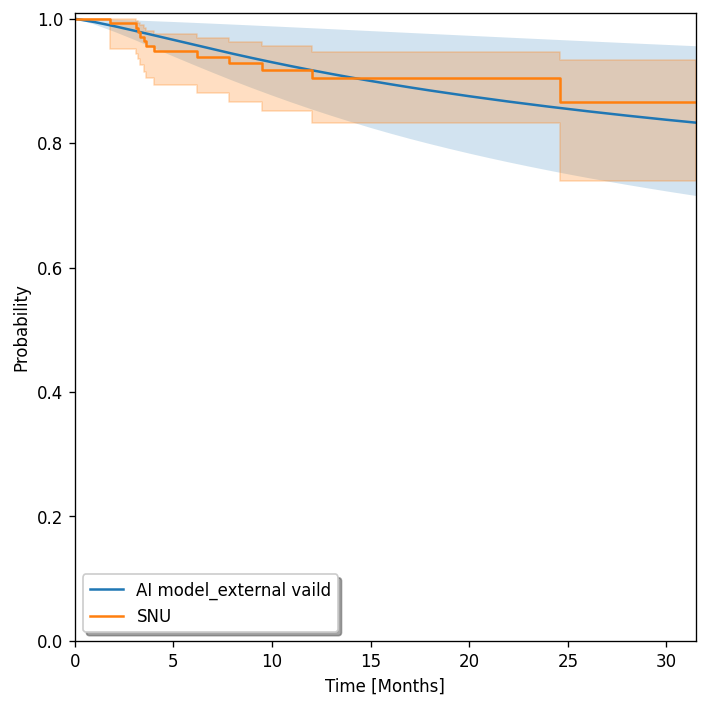

In [155]:
from lifelines.statistics import logrank_test
fig = plt.figure(figsize=(6, 6), dpi=120)
ax = fig.add_subplot(1, 1, 1)

# fig, ax = plt.subplots(figsize=(6, 6), dpi=120)
# plt.figure(figsize=(6, 6), dpi=120)



line1, = ax.plot(mean_snu_pfs.columns, mean_snu_pfs.mean(), label="AI model_external vaild")
line2 = ax.fill_between(mean_snu_pfs.columns, lower_ci_snu_pfs.mean(), upper_ci_snu_pfs.mean(), alpha=0.2)

line3 = kmf_2.plot_survival_function(label='SNU')
# line4 = kmf_3.plot_survival_function(label='SNU')


# results = logrank_test(T1, T2, event_observed_A=E1, event_observed_B=E2)


ax.legend(shadow=True)


plt.xlabel('Time [Months]')
plt.ylabel('Probability')
plt.xlim([-0.01, tt])
plt.ylim([0.0, 1.01])
plt.tight_layout()